In [2]:
# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [17]:
cars = pd.read_csv("CarPrice.csv")
print(cars.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

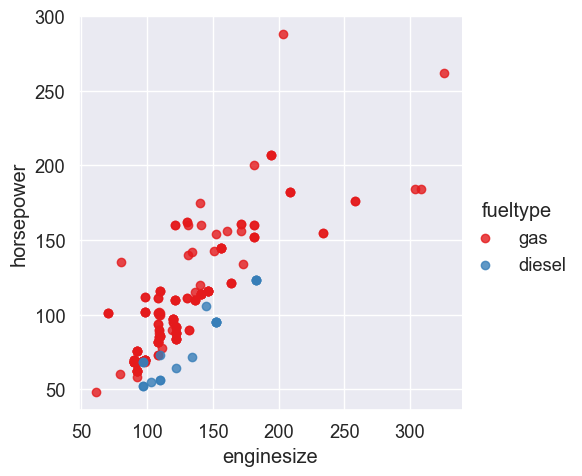

In [27]:
# plot our data
sns.lmplot(x="enginesize", y="horsepower", data=cars, hue="fueltype", palette="Set1", fit_reg=False);

In [49]:
# format and pre-process our data
type_label = np.where(cars["fueltype"]=="gas", 0, 1)
car_features = cars.columns.values[0:].tolist()
car_features
functionalities = cars[["stroke", "compressionratio"]].values
print(functionalities)

[[ 2.68   9.   ]
 [ 2.68   9.   ]
 [ 3.47   9.   ]
 [ 3.4   10.   ]
 [ 3.4    8.   ]
 [ 3.4    8.5  ]
 [ 3.4    8.5  ]
 [ 3.4    8.5  ]
 [ 3.4    8.3  ]
 [ 3.4    7.   ]
 [ 2.8    8.8  ]
 [ 2.8    8.8  ]
 [ 3.19   9.   ]
 [ 3.19   9.   ]
 [ 3.19   9.   ]
 [ 3.39   8.   ]
 [ 3.39   8.   ]
 [ 3.39   8.   ]
 [ 3.03   9.5  ]
 [ 3.11   9.6  ]
 [ 3.11   9.6  ]
 [ 3.23   9.41 ]
 [ 3.23   9.4  ]
 [ 3.39   7.6  ]
 [ 3.23   9.4  ]
 [ 3.23   9.4  ]
 [ 3.23   9.4  ]
 [ 3.39   7.6  ]
 [ 3.46   8.5  ]
 [ 3.9    7.   ]
 [ 3.41   9.6  ]
 [ 3.41   9.2  ]
 [ 3.07  10.1  ]
 [ 3.41   9.2  ]
 [ 3.41   9.2  ]
 [ 3.41   9.2  ]
 [ 3.41   9.2  ]
 [ 3.58   9.   ]
 [ 3.58   9.   ]
 [ 3.58   9.   ]
 [ 3.58   9.   ]
 [ 3.58   9.   ]
 [ 3.58   9.1  ]
 [ 3.23   8.5  ]
 [ 3.11   9.6  ]
 [ 3.11   9.6  ]
 [ 3.23   9.2  ]
 [ 4.17   8.1  ]
 [ 4.17   8.1  ]
 [ 2.76  11.5  ]
 [ 3.15   9.   ]
 [ 3.15   9.   ]
 [ 3.15   9.   ]
 [ 3.15   9.   ]
 [ 3.15   9.   ]
 [ 3.255  9.4  ]
 [ 3.255  9.4  ]
 [ 3.255  9.4  ]
 [ 3.255  9.4 

In [50]:
# fit the model
model = svm.SVC(kernel="linear")
model.fit(functionalities,type_label)

SVC(kernel='linear')

In [51]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0])/w[1]
print(yy)

# plot the parallels to the separating hyperpane
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a*b[0])
b = model.support_vectors_[1]
yy_up = a * xx + (b[1] - a*b[0])

[14.10120063 14.05222103 14.00324144 13.95426185 13.90528226 13.85630267
 13.80732307 13.75834348 13.70936389 13.6603843  13.61140471 13.56242512
 13.51344552 13.46446593 13.41548634 13.36650675 13.31752716 13.26854756
 13.21956797 13.17058838 13.12160879 13.0726292  13.02364961 12.97467001
 12.92569042 12.87671083 12.82773124 12.77875165 12.72977205 12.68079246
 12.63181287 12.58283328 12.53385369 12.4848741  12.4358945  12.38691491
 12.33793532 12.28895573 12.23997614 12.19099654 12.14201695 12.09303736
 12.04405777 11.99507818 11.94609858 11.89711899 11.8481394  11.79915981
 11.75018022 11.70120063]


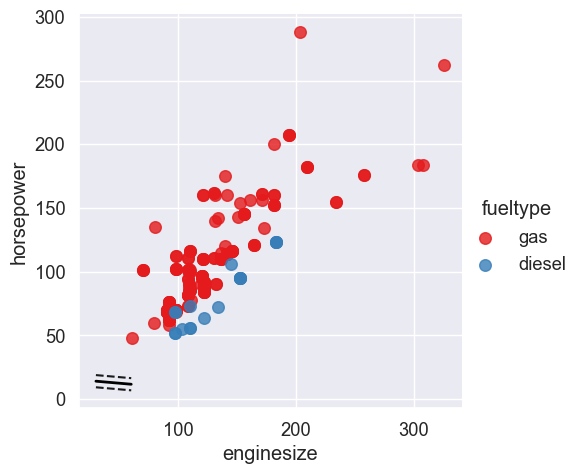

In [48]:
sns.lmplot(x="enginesize", y="horsepower", data=cars, hue="fueltype", palette="Set1", fit_reg=False, scatter_kws={"s":70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down,'k--')
plt.plot(xx, yy_up,'k--')